# Flight Price Prediction<br>
## Problem Statement:<br>
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.<br>

Size of training set: 10683 records<br>

Size of test set: 2671 records<br>

## FEATURES:<br>
Airline: The name of the airline.<br>

Date_of_Journey: The date of the journey<br>

Source: The source from which the service begins.<br>

Destination: The destination where the service ends.<br>

Route: The route taken by the flight to reach the destination.<br>

Dep_Time: The time when the journey starts from the source.<br>

Arrival_Time: Time of arrival at the destination.<br>

Duration: Total duration of the flight.<br>

Total_Stops: Total stops between the source and destination.<br>

Additional_Info: Additional information about the flight<br>

Price: The price of the ticket<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Test_set.xlsx')

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


1) There are 11 columns in training set and 10 columns in testing set.<br>
2) All the columns are objecyt type and target feature "Price" is integer.<br>
3) Training dataset has only 2 null values in "Route" and "Total_stops".<br>
4) Testing dataset has no null values.<br>

# EDA and PREPROCESSING

In [7]:
train['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

Price ranges from 1759 to 79512.

In [8]:
train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

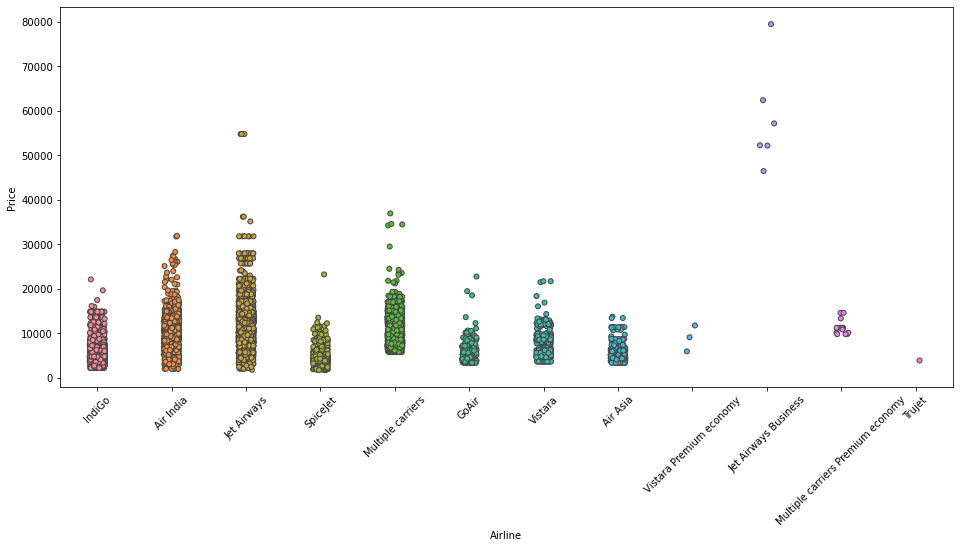

In [9]:
plt.figure(figsize=(16,7))
plt.xticks(rotation=45)
sns.stripplot(train['Airline'], train['Price'], linewidth=1)

1) Jet Airways Business has high price.<br>
2) People mostly prefer to travel in Jet Airways. May be it has less prices comparetively?<br>
3) Multiple carriers Premium economy, Vistara Premium economy and Trujet has low prices and less entries. We will club them together to make one class in this feature.<br>

In [10]:
train['Airline'].replace(['Multiple carriers Premium economy','Trujet', 'Vistara Premium economy'], 'Other', inplace = True)

In [11]:
test['Airline'].replace(['Multiple carriers Premium economy','Trujet', 'Vistara Premium economy'], 'Other', inplace = True)

In [12]:
train['Airline'].value_counts()

Jet Airways             3849
IndiGo                  2053
Air India               1752
Multiple carriers       1196
SpiceJet                 818
Vistara                  479
Air Asia                 319
GoAir                    194
Other                     17
Jet Airways Business       6
Name: Airline, dtype: int64

We created a new class for the three classes.

Date_of_Journey is in Object. Let's retreive month, day and week in the year of the journey.

In [13]:
train['Date_of_Journey']  = pd.to_datetime(train['Date_of_Journey'])

In [14]:
train['month'] = train['Date_of_Journey'].dt.month

train['day'] = train['Date_of_Journey'].dt.day

We have extracted month and day of the journey. lets look at the price distribution.

In [15]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


<AxesSubplot:xlabel='month', ylabel='Price'>

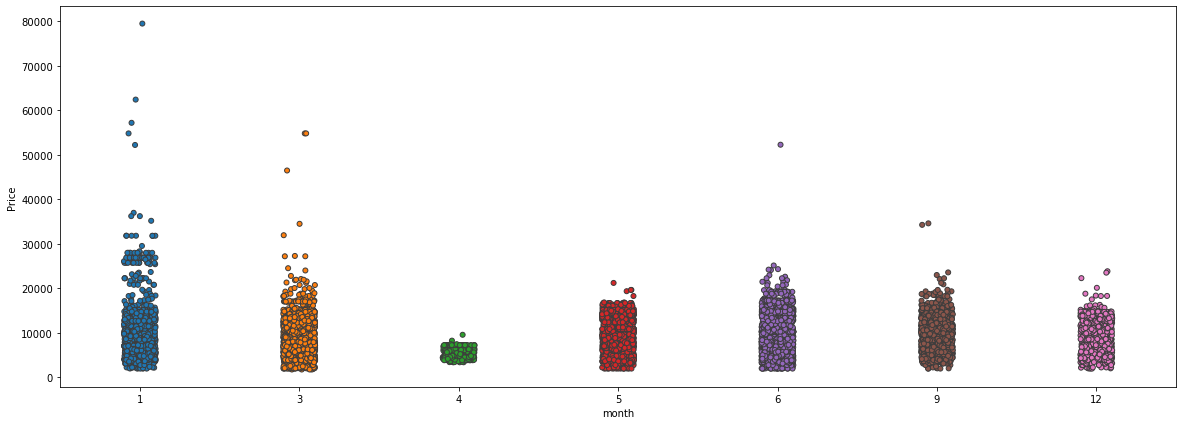

In [16]:
plt.figure(figsize=(20,7))
sns.stripplot(train['month'], train['Price'], linewidth=1)

In [17]:
train['month'].value_counts()

6     2536
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: month, dtype: int64

There are only 7 months and most travel was in June. April had less entries. 

<AxesSubplot:xlabel='day', ylabel='Price'>

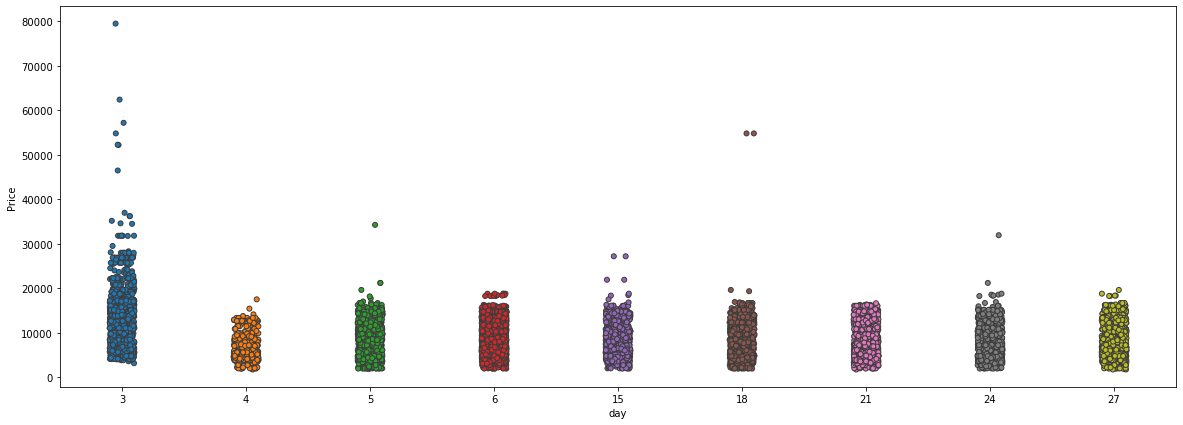

In [18]:
plt.figure(figsize=(20,7))
sns.stripplot(train['day'], train['Price'], linewidth=1)

In [19]:
train['day'].value_counts()

6     2166
5     1392
3     1361
27    1130
21    1111
24    1052
15     984
18     832
4      655
Name: day, dtype: int64

On 3 day of the month has a high price entries. 6 month and 6 day has more entries.

<AxesSubplot:>

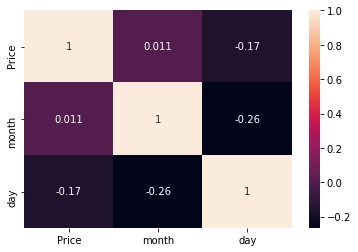

In [20]:
sns.heatmap(train.corr(), annot=True)

In [21]:
test['Date_of_Journey']  = pd.to_datetime(test['Date_of_Journey'])

In [22]:
test['month'] = test['Date_of_Journey'].dt.month

test['day'] = test['Date_of_Journey'].dt.day

Extracting and creating new columns for Test data

In [23]:
train['Dep_Time']  = pd.to_datetime(train['Dep_Time'])

test['Dep_Time']  = pd.to_datetime(test['Dep_Time'])

In [24]:
# Extracting Hours
train["Dep_hour"] = train["Dep_Time"].dt.hour

# Extracting Minutes
train["Dep_min"] = train["Dep_Time"].dt.minute

In [25]:
# Extracting Hours
test["Dep_hour"] = test["Dep_Time"].dt.hour

# Extracting Minutes
test["Dep_min"] = test["Dep_Time"].dt.minute

From Departure Time we extracted hour and minutes.

In [26]:
train['Arrival_Time']  = pd.to_datetime(train['Arrival_Time'])

In [27]:
test['Arrival_Time']  = pd.to_datetime(test['Arrival_Time'])

In [28]:
# Extracting Hours
train["Arrival_hour"] = train['Arrival_Time'].dt.hour

# Extracting Minutes
train["Arrival_min"] = train['Arrival_Time'].dt.minute

In [29]:
# Extracting Hours
test["Arrival_hour"] = test['Arrival_Time'].dt.hour

# Extracting Minutes
test["Arrival_min"] = test['Arrival_Time'].dt.minute

From Arrival Time we extracted hour and Minutes.

Now lets convert them into intergers.

In [30]:
duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
# Adding duration_hours and duration_mins list to train_data dataframe

train["Duration_hours"] = duration_hours
train["Duration_mins"] = duration_mins

In [31]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'month', 'day', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [32]:
duration = list(test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
# Adding duration_hours and duration_mins list to train_data dataframe

test["Duration_hours"] = duration_hours
test["Duration_mins"] = duration_mins

In [33]:
test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'month', 'day', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [34]:
train.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration'], axis=1, inplace=True)
test.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration'], axis=1, inplace=True)

Dropped 'Date_of_Journey','Dep_Time','Arrival_Time','Duration' as we have extracted required information out of these features.

In [35]:
train['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [36]:
test['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Train and test data have same clases.

<AxesSubplot:xlabel='Source', ylabel='Price'>

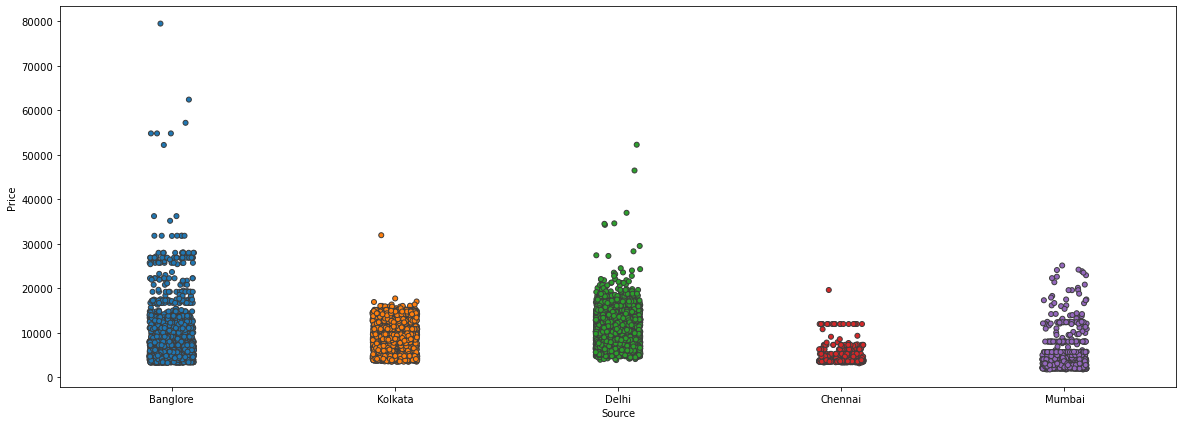

In [37]:
plt.figure(figsize=(20,7))
sns.stripplot(train['Source'], train['Price'], linewidth=1)

Flights from Banglore has more price and most flights start from Delhi. Least are from Chennai.

In [38]:
train['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [39]:
test['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

Train and test data have same clases.

<AxesSubplot:xlabel='Destination', ylabel='Price'>

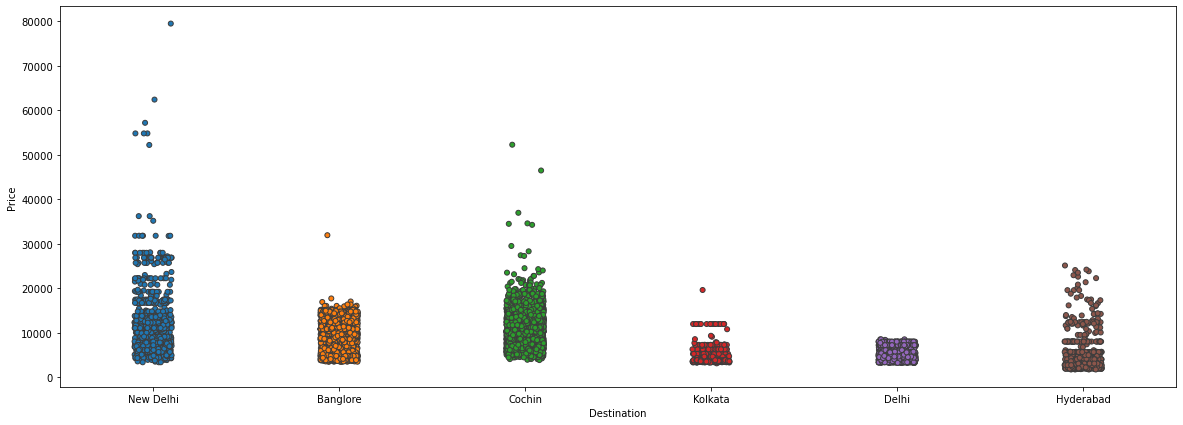

In [40]:
plt.figure(figsize=(20,7))
sns.stripplot(train['Destination'], train['Price'], linewidth=1)

If the destination is New Delhi, the price is more, next is cochin and the Hyderabad.

In [41]:
train['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10683, dtype: object

In [42]:
train['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10683, dtype: object

We wil drop Route as Total stops gives the same info.

In [43]:
train.drop('Route', axis=1, inplace=True)
test.drop('Route', axis=1, inplace=True)

In [44]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [45]:
train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [46]:
def stops(string):
    if string == 'non-stop':
        return 0
    elif string == '1 stop':
        return 1
    elif string == '2 stops':
        return 2
    elif string == '3 stops':
        return 3
    elif string == '4 stops':
        return 4
    else:
        return 1

In [47]:
train['Total_Stops'] = train['Total_Stops'].apply(stops)

In [48]:
test['Total_Stops'] = test['Total_Stops'].apply(stops)

We labeled all the classes from 0 to 4.

In [49]:
train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [50]:
test['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
1 Long layover                     1
Business class                     1
Name: Additional_Info, dtype: int64

We will drop the column Additional_Info as we have most of the column as No info.

In [51]:
train.drop('Additional_Info', axis=1, inplace=True)
test.drop('Additional_Info', axis=1, inplace=True)

# ENCODING

In [52]:
train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'month',
       'day', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

In [53]:
test.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'month', 'day',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

We will use get_dummies to encode the nominal features.

In [54]:
dummies_train =  pd.get_dummies(train[['Airline','Source','Destination',]], drop_first=True)
train.drop(['Airline','Source','Destination',],axis=1,inplace=True)

In [55]:
dummies_test =  pd.get_dummies(test[['Airline','Source','Destination',]], drop_first=True)
test.drop(['Airline','Source','Destination',],axis=1,inplace=True)

In [56]:
merged_train = pd.concat([train,dummies_train], axis='columns')
merged_test = pd.concat([test,dummies_test], axis='columns')

In [57]:
merged_train.head()

,Total_Stops,Price,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,3,24,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [58]:
merged_test.head()

,Total_Stops,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,5,21,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,21,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,6,24,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [59]:
train = merged_train
test = merged_test

<AxesSubplot:>

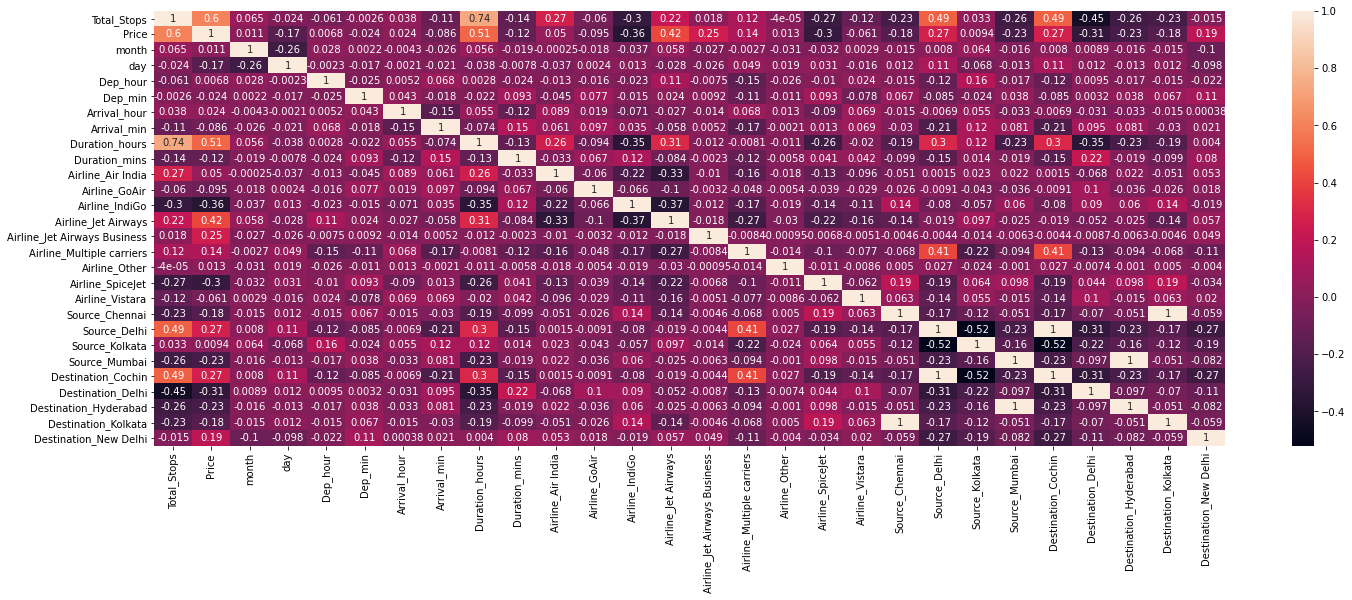

In [60]:
plt.figure(figsize=(24,8))
sns.heatmap(train.corr(), annot=True)

# MODEL BUILDING

In [61]:
x = train.drop('Price', axis=1)
y = train['Price']

## Finding the best random state for the model


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = r2_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.6787841786937827 on random state 193


In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=193)

## Best Algorithm for our problem.

In [65]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(lr.score(x_train,y_train))

mean_squared_error: 7064926.678697071
mean_absolute_error: 1927.4518570256648
r2_score: 0.6787841786937827
0.6018400256291818


In [66]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(dt.score(x_train,y_train))

mean_squared_error: 8398779.565548146
mean_absolute_error: 1395.692551863984
r2_score: 0.6181388712423324
0.9698760689163056


In [67]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(rf.score(x_train,y_train))

mean_squared_error: 4800275.3602674585
mean_absolute_error: 1182.1198853351452
r2_score: 0.7817494133387559
0.9523444068852376


In [68]:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(kn.score(x_train,y_train))

mean_squared_error: 8427040.12138512
mean_absolute_error: 1861.802246139448
r2_score: 0.616853969350694
0.7137216927878776


In [69]:
sv = SVR()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(sv.score(x_train,y_train))

mean_squared_error: 21879666.946206637
mean_absolute_error: 3546.39712968407
r2_score: 0.005213287036066272
0.004447093568811233


In [70]:
ab = AdaBoostRegressor()
ab.fit(x_train,y_train)
pred=ab.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(ab.score(x_train,y_train))

mean_squared_error: 8970915.872921893
mean_absolute_error: 2441.650850552378
r2_score: 0.5921259708641422
0.5408677637303327


In [71]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(gb.score(x_train,y_train))

mean_squared_error: 4009023.9841240156
mean_absolute_error: 1449.2663487457808
r2_score: 0.8177246572735541
0.7872885429811416


In [72]:
from sklearn.linear_model import Ridge,Lasso

In [73]:
r = Ridge()
r.fit(x_train,y_train)
pred = r.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(r.score(x_train,y_train))

mean_squared_error: 7200310.1526003275
mean_absolute_error: 1936.7295553480085
r2_score: 0.6726287979320472
0.5993169582754327


In [74]:
l = Lasso()
l.fit(x_train,y_train)
pred = l.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(l.score(x_train,y_train))

mean_squared_error: 7055714.522395642
mean_absolute_error: 1925.6085364281155
r2_score: 0.6792030210239214
0.6016257298053296


Gradient Boosting Regression and Random Forest Regression has best performances. We will cross validate.

## Crossvalidation

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Linear Regression:", lrc.mean())

Cross validation score of Linear Regression: 0.6144572212071695


In [77]:
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest:", rfc.mean())

Cross validation score of Random Forest: 0.8031524910873346


In [78]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree :", dtc.mean())

Cross validation score of Decision Tree : 0.6930935276236265


In [79]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors:", knc.mean())

Cross validation score of Kneigbors: 0.5743071381672229


In [80]:
svc1 = cross_val_score(sv, x, y, cv=5)

print("Cross validation score of Support Vector:", svc1.mean())

Cross validation score of Support Vector: 0.003943584385357824


In [81]:
adr = cross_val_score(ab, x, y, cv=5)

print("Cross validation score of AdaBoost:", adr.mean())

Cross validation score of AdaBoost: 0.32135139040350114


In [82]:
gbr = cross_val_score(gb, x, y, cv=5)

print("Cross validation score of GradientBoost:", gbr.mean())

Cross validation score of GradientBoost: 0.7756120978147235


GradientBoosting Regression and Random Forest Regression has best performance.

## Hyperparameter Tuning with GradientBoostingRegressor

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'n_estimators':[10,50,100,150], 'max_depth': np.arange(2,10),
             'criterion':['friedman_mse''mse','mae'], 'max_features':['auto','sqrt', 'log2'],
             'loss':['ls','lad','huber','quantile']}

In [85]:
GCV = RandomizedSearchCV(GradientBoostingRegressor(), parameters, cv=5)
GCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'criterion': ['friedman_msemse', 'mae'],
                                        'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 50, 100, 150]})

In [86]:
#Printing the best parameters.
GCV.best_params_

{'n_estimators': 50,
 'max_features': 'log2',
 'max_depth': 4,
 'loss': 'huber',
 'criterion': 'mae'}

## Model with GradientBoostingRegressor

In [93]:
model = GradientBoostingRegressor(n_estimators=50, criterion='mae', max_depth=4, max_features='log2', loss='huber')
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
pred1 = model.predict(test)

0.6908764555916559


## Hyperparameter Tuning with RandomForestRegression

In [89]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'n_estimators':[10,50,100,150], 'max_depth': np.arange(2,10),
             'criterion':['mse','mae'], 'max_features':['auto','sqrt', 'log2']}

In [90]:
GCV = RandomizedSearchCV(RandomForestRegressor(), parameters, cv=5)
GCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 50, 100, 150]})

In [91]:
#Printing the best parameters.
GCV.best_params_

{'n_estimators': 150,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'mae'}

## Model with RandomForestRegression

In [94]:
model1 = RandomForestRegressor(n_estimators=150, criterion='mae', max_depth=9, max_features='auto')
model1.fit(x_train,y_train)
print(model1.score(x_train,y_train))
pred1 = model1.predict(test)

0.8525338873803404


# SAVING THE BEST MODEL FOR SUBMISSION.

We will save model with RandomForestRegression

In [95]:
import joblib
joblib.dump(model1,"Flight_Price_Prediction_submission.pkl")

['Flight_Price_Prediction_submission.pkl']